# ML-Fundamentals - Neural Networks - Exercise: Neural Network Framework

# Tasks
Your main goal is to extend the existing framework, to perform experiments with different model combinations and to document your observations. Here is a list of necessary tasks and some ideas for additional points:
  * (6) Write a data loader for a different image dataset, e.g., CIFAR or Labelled Faces in the Wild. Feel free to search a dataset you like to classify. Create and train a simple fully connected network on that dataset in this notebook.
  * (10) Implement the `Conv` and `Pool` Layer in `layer.py`. Create and train a convolutional neural network on Mnist and your chosen dataset in this notebook.

Bonus points
  * (5) 1 to 5 points are given for improving the class and method comments in the framework files. Points are given based on the quality and quantity of the comments.
  * (1) For each additional implemented activation functions in `activation_func.py` you get 1 bonus point (max 4 points). Test your implementation in this notebook and observe effects on your networks. Keep an eye on your layer initialization.
  * (2) Implement `Dropout` in `layer.py` and test your implementation with a toy example. Create and train a model that includes Dropout as a layer.
  * (5) Implement `Batchnorm` in `layer.py` and test your implementation with a toy example. Create and train a model that includes Dropout as a layer.
  * (4) Implement another optimization algorithm in `optimizer.py`. Train one of your models with that new optimizer.
  * (5) Do something extra, up to 5 points.  
  
Please document thoroughly and explain what you do in your experiments, so that work in the notebook is comprehensible, else no points are given.

# Requirements

## Python-Modules

In [1]:
# custom 
from htw_nn_framework.networks import NeuralNetwork
from htw_nn_framework.layer import *
from htw_nn_framework.activation_func import *
from htw_nn_framework.loss_func import *
from htw_nn_framework.optimizer import *

# third party
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [11]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(flatten=False, one_hot_enc=False, normalized=True)
print(train_images.shape, train_labels.shape)

# reshape to match generell framework architecture 
train_images, test_images = train_images.reshape(60000, 1, 28, 28), test_images.reshape(10000, 1, 28, 28)            
print(train_images.shape, train_labels.shape)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted
(60000, 28, 28) (60000,)
(60000, 1, 28, 28) (60000,)


# MNIST Fully Connected Network Example
This model and optimization is taken from `framework_exercise.ipynb` as an example for a typical pipeline using the framework files.

In [3]:
# design a three hidden layer architecture with Dense-Layer
# and ReLU as activation function
def fcn_mnist():
    flat = Flatten()
    hidden_01 = FullyConnected(784, 500)
    relu_01 = ReLU()
    hidden_02 = FullyConnected(500, 200)
    relu_02 = ReLU()
    hidden_03 = FullyConnected(200, 100)
    relu_03 = ReLU()
    ouput = FullyConnected(100, 10)
    return [flat, hidden_01, relu_01, hidden_02, relu_02, hidden_03, relu_03, ouput]

# create a neural network on specified architecture with softmax as score function
#fcn = NeuralNetwork(fcn_mnist(), score_func=LossCriteria.softmax)

# optimize the network and a softmax loss
#fcn = Optimizer.sgd(fcn, train_images, train_labels, LossCriteria.cross_entropy_softmax, batch_size=64, epoch=10, learning_rate=0.01, X_test=test_images, y_test=test_labels, verbose=True)

# Todo: Your Extensions and Experiments

## Data



Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


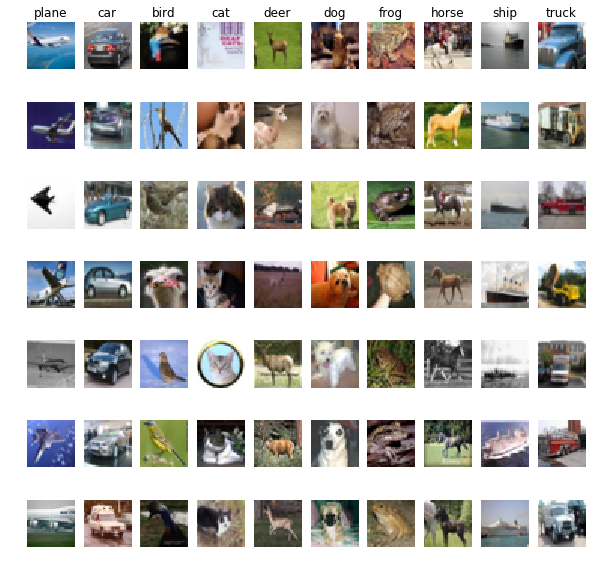

Epoch 1
Loss = 0.4049969870554769 :: Training = 0.9607666666666667 :: Test = 0.9543
Epoch 2
Loss = 0.25672954506362317 :: Training = 0.97305 :: Test = 0.9613
Epoch 3
Loss = 0.27166060196562747 :: Training = 0.9780166666666666 :: Test = 0.9674
Epoch 4
Loss = 0.3204176914180467 :: Training = 0.9865666666666667 :: Test = 0.9712
Epoch 5
Loss = 0.1359746472003935 :: Training = 0.9805333333333334 :: Test = 0.968
Epoch 6
Loss = 0.18710553050811657 :: Training = 0.98085 :: Test = 0.967
Epoch 7
Loss = 0.13187000560919515 :: Training = 0.9912833333333333 :: Test = 0.9765
Epoch 8
Loss = 0.20304390174678114 :: Training = 0.98775 :: Test = 0.9721
Epoch 9
Loss = 0.18162116866925176 :: Training = 0.9927833333333334 :: Test = 0.9775
Epoch 10
Loss = 0.15276823387440763 :: Training = 0.9925333333333334 :: Test = 0.9759


In [15]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:      
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float64")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(root_folder):
    xs = []
    ys = []
    for batch in range(1,6):
        f = os.path.join(root_folder, 'data_batch_%d' % (batch, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(root_folder, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py' 
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


        
